In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 5)  # 입력층에서 은닉층
        self.relu = nn.ReLU()           # 활성화 함수
        self.layer2 = nn.Linear(5, 1)   # 은닉층에서 출력층
        self.sigmoid = nn.Sigmoid()     # 이진 분류를 위한 활성화 함수

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x


In [12]:
# 손실 함수 및 옵티마이저 설정

model = SimpleNN()
criterion = nn.BCELoss()  # 이진 교차 엔트로피 손실
# optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저
# optimizer = optim.Adam(model.parameters())
# optimizer = optim.RMSprop(model.parameters())
optimizer = optim.Adagrad(model.parameters())

In [13]:
# 훈련 데이터 준비

# 임의의 데이터 생성
inputs = torch.randn(100, 10)  # 100개의 샘플, 각각 10개의 특성
targets = torch.rand(100, 1).round()  # 이진 타겟


In [14]:
# 훈련 루프

num_epochs = 100
for epoch in range(num_epochs):
    # 경사 초기화
    optimizer.zero_grad()

    # 순전파
    outputs = model(inputs)

    # 손실 계산
    loss = criterion(outputs, targets)

    # 역전파
    loss.backward()

    # 가중치 업데이트
    optimizer.step()

    # 로그 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6945
Epoch [20/100], Loss: 0.6885
Epoch [30/100], Loss: 0.6842
Epoch [40/100], Loss: 0.6805
Epoch [50/100], Loss: 0.6771
Epoch [60/100], Loss: 0.6737
Epoch [70/100], Loss: 0.6702
Epoch [80/100], Loss: 0.6665
Epoch [90/100], Loss: 0.6625
Epoch [100/100], Loss: 0.6586


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

# 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 5)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

def select_opti_with_fit(model ,opti):
    # 모델 초기화
    model = model
    criterion = nn.BCELoss()
    optimizer = opti
    
    # 데이터 생성
    inputs = torch.randn(100, 10)
    targets = torch.rand(100, 1).round()

    # 훈련 루프
    num_epochs = 1000
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()   # 그래디언트를 0으로 초기화
        outputs = model(inputs)  # 모델에 입력을 주어 출력을 얻음
        loss = criterion(outputs, targets)  # 손실 계산
        loss.backward()  # 손실에 대한 그래디언트 계산
        optimizer.step()  # 가중치 업데이트
        
        losses.append(loss.item())
        # if (epoch+1) % 10 == 0:
        #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    return losses

In [48]:
model = SimpleNN()

op_sgd = optim.SGD(params=model.parameters(), lr=0.01)  # SGD 옵티마이저
op_adm = optim.Adam(params=model.parameters())  # Adam 옵티마이저
op_rms = optim.RMSprop(params=model.parameters())  # RMSprop 옵티마이저
op_grd = optim.Adagrad(params=model.parameters())  # Adagrad 옵티마이저

losses_sgd = select_opti_with_fit(model ,op_sgd)
losses_adam = select_opti_with_fit(model,op_adm)
losses_rmsprop = select_opti_with_fit(model,op_rms)
losses_adagrad = select_opti_with_fit(model, op_grd)

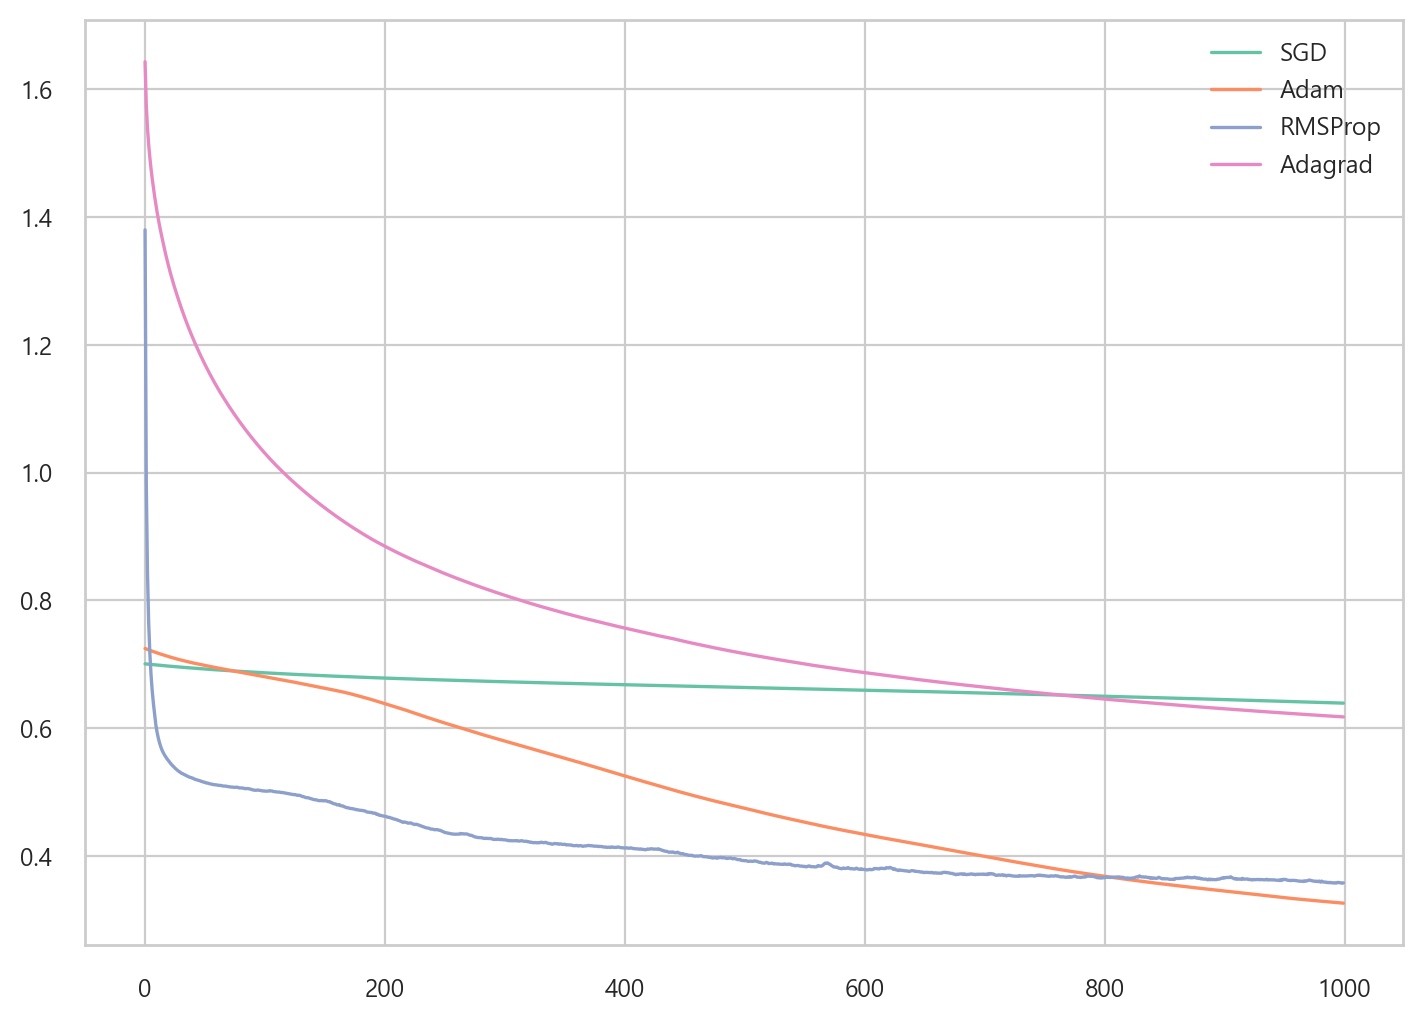

In [50]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(losses_sgd,label = "SGD" , ax=ax)
sns.lineplot(losses_adam,label = "Adam" , ax=ax)
sns.lineplot(losses_rmsprop,label = "RMSProp" , ax=ax)
sns.lineplot(losses_adagrad,label = "Adagrad" , ax=ax)
ax.legend()